In [8]:
######Import Required Library 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Reading Data

In [9]:

df=pd.read_csv("data.csv")

In [10]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Plots: In this section, all attributes of data are plotted and interrupted 

EDUC

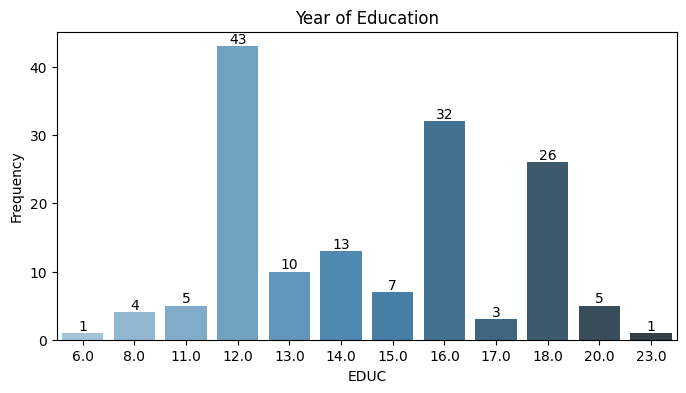

In [18]:
df1 = df.groupby(["Subject ID"])["EDUC"].mean().value_counts().reset_index().rename(columns = {"EDUC" : "EDUC", "count" : "Frequency"})
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='EDUC', y='Frequency', data=df1, palette="Blues_d", ax=ax)
plt.xlabel('EDUC')
plt.ylabel('Frequency')
plt.title('Year of Education')
ax.bar_label(ax.containers[0])
plt.show()

SES

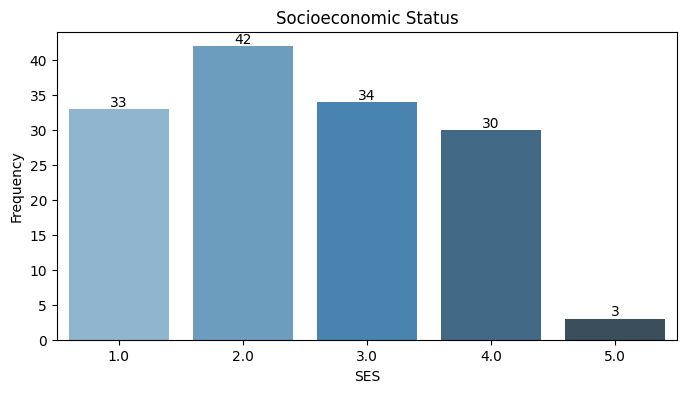

In [21]:
df2 = df.groupby(["Subject ID"])["SES"].mean().value_counts().reset_index().rename(columns={"SES": "SES", "count" : "Frequency"})
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='SES', y='Frequency', data=df2, palette='Blues_d', ax=ax)
plt.xlabel('SES')
plt.ylabel('Frequency')
plt.title('Socioeconomic Status')
ax.bar_label(ax.containers[0])
plt.show()

MMSE

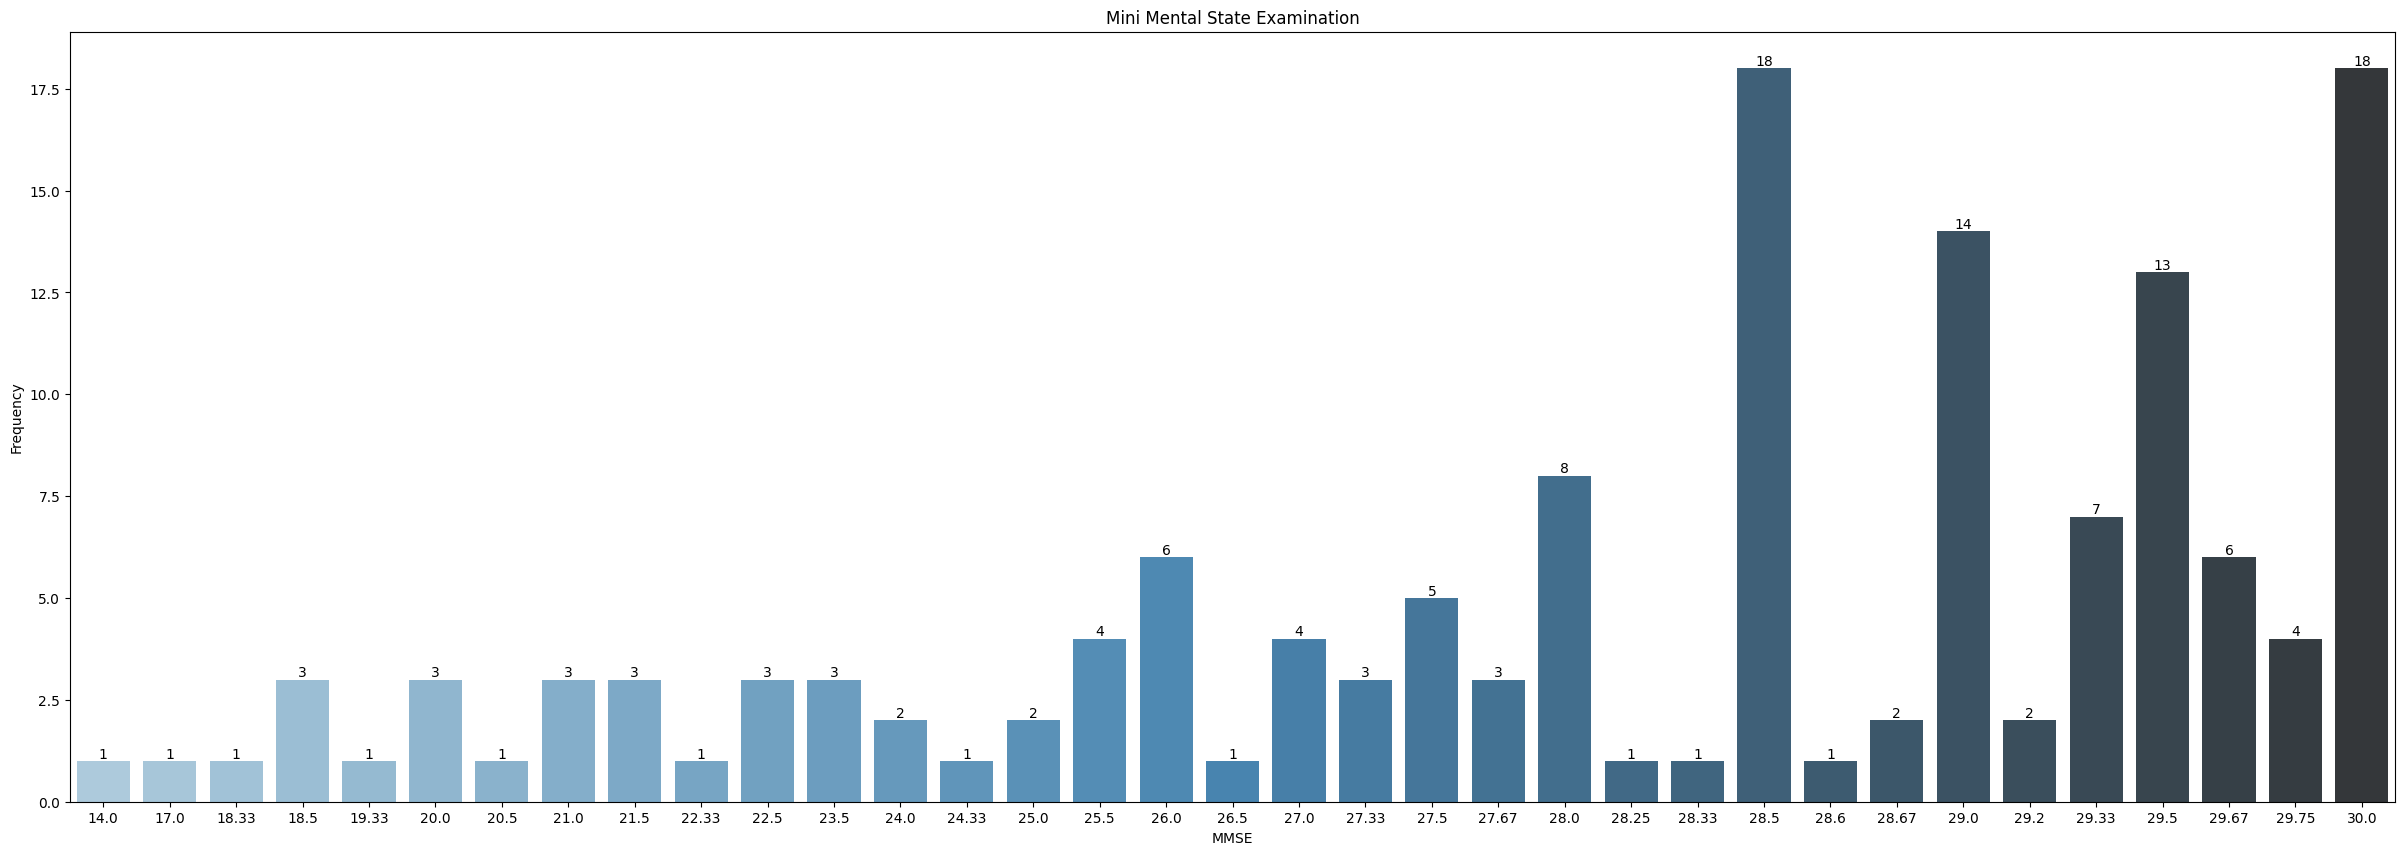

In [25]:
df3 = df.groupby(["Subject ID"])["MMSE"].mean().value_counts().reset_index().rename(columns={"MMSE": "MMSE", "count" : "Frequency"})
df3['MMSE'] = df3['MMSE'].round(2)
fig, ax = plt.subplots(figsize=(30,10))
sns.barplot(x='MMSE', y='Frequency', data=df3, palette='Blues_d', ax=ax)
plt.xlabel('MMSE')
plt.ylabel('Frequency')
plt.title('Mini Mental State Examination')
ax.bar_label(ax.containers[0])
plt.show()


CDR

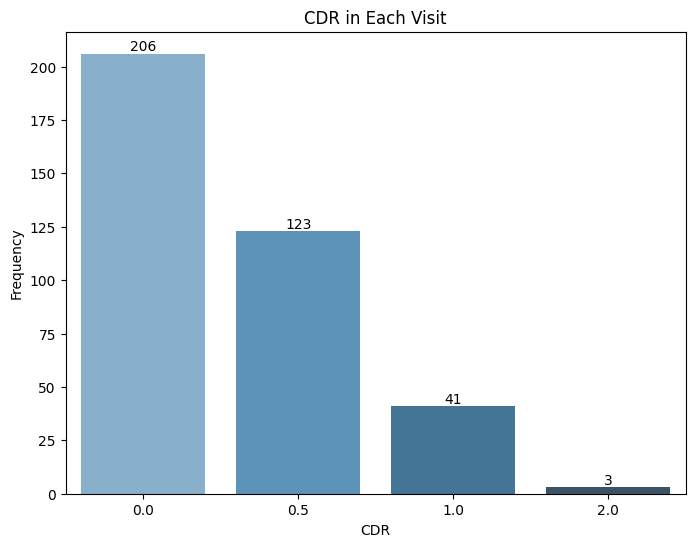

In [31]:
cdr_counts=df['CDR'].value_counts()
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=cdr_counts.index, y=cdr_counts.values, palette="Blues_d", ax=ax)
plt.xlabel('CDR')
plt.ylabel('Frequency')
plt.title('CDR in Each Visit')
ax.bar_label(ax.containers[0])
plt.show()

Histogram of eTIV


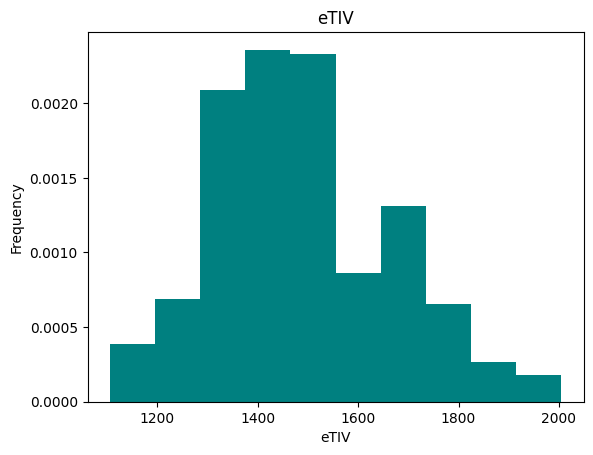

In [71]:
plt.hist(df['eTIV'].values,density=True, color = "teal")
plt.xlabel('eTIV')
plt.ylabel('Frequency')
plt.title('eTIV')
plt.show()

Histogram of nWBV

Text(0.5, 1.0, 'nWBV')

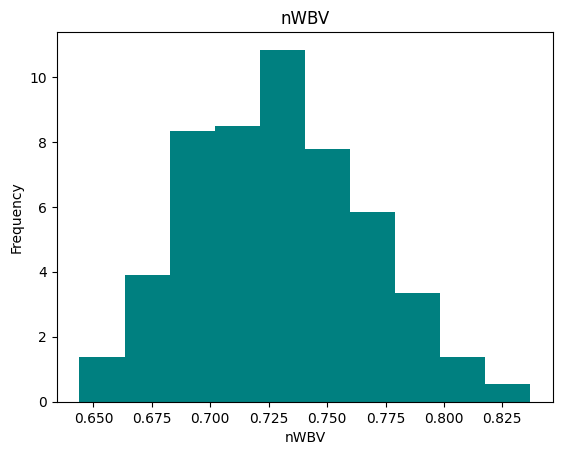

In [72]:
 plt.hist(df['nWBV'].values,density=True, color = "teal")
plt.xlabel('nWBV')
plt.ylabel('Frequency')
plt.title('nWBV')


Histogram of ASF

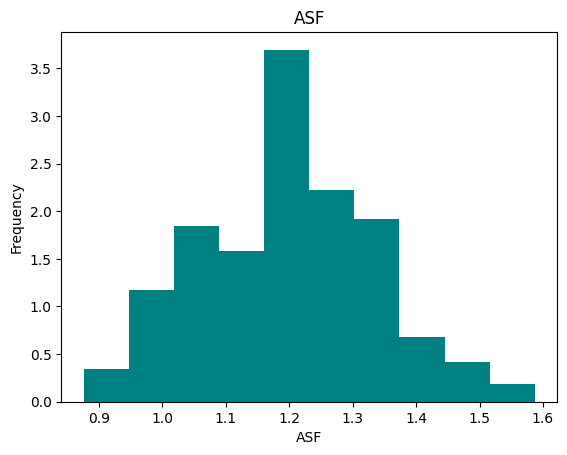

In [75]:
plt.hist(df['ASF'].values,density=True, color ="teal")
plt.xlabel('ASF')
plt.ylabel('Frequency')
plt.title('ASF')
plt.show()


 Boxplot Data

<AxesSubplot: >

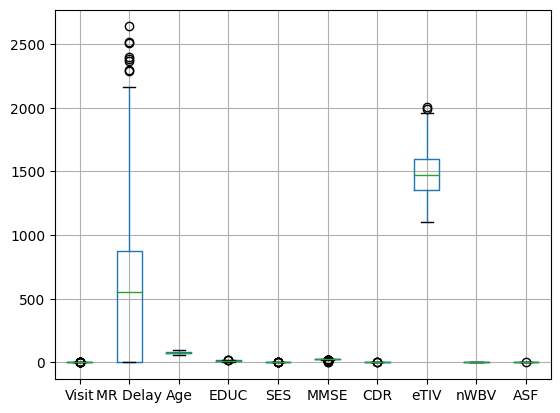

In [76]:
df.boxplot()


Outlier Detection

#eTIV Outlier Check


997.0 1957.0


,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876


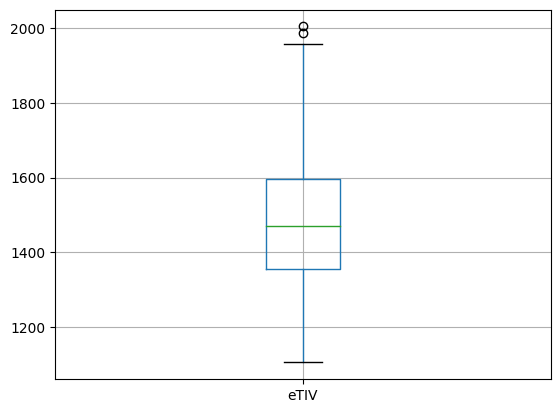

In [78]:
df.iloc[:,[12]].boxplot()
#eTIV
Q1 = df.iloc[:,12].quantile(0.25)
Q3 = df.iloc[:,12].quantile(0.75)
LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)
print(LB,UB)
df[df["eTIV"] <997.0 ]
df[df["eTIV"] >1957.0 ]


-1309.5 2182.5


,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
32,OAS2_0017,OAS2_0017_MR5,Nondemented,5,2400,M,R,86,12,3.0,27.0,0.0,1813,0.761,0.968
71,OAS2_0036,OAS2_0036_MR5,Nondemented,5,2369,F,R,75,13,4.0,29.0,0.0,1349,0.778,1.301
75,OAS2_0037,OAS2_0037_MR4,Demented,4,2508,M,R,89,12,4.0,26.0,0.5,1485,0.706,1.181
153,OAS2_0070,OAS2_0070_MR5,Nondemented,5,2386,M,R,86,17,1.0,30.0,0.0,1720,0.705,1.020
159,OAS2_0073,OAS2_0073_MR4,Nondemented,4,2288,F,R,76,14,3.0,29.0,0.0,1490,0.774,1.178
160,OAS2_0073,OAS2_0073_MR5,Nondemented,5,2517,F,R,77,14,3.0,29.0,0.0,1504,0.769,1.167
265,OAS2_0127,OAS2_0127_MR5,Converted,5,2639,M,R,86,18,1.0,30.0,0.5,1670,0.669,1.051
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040


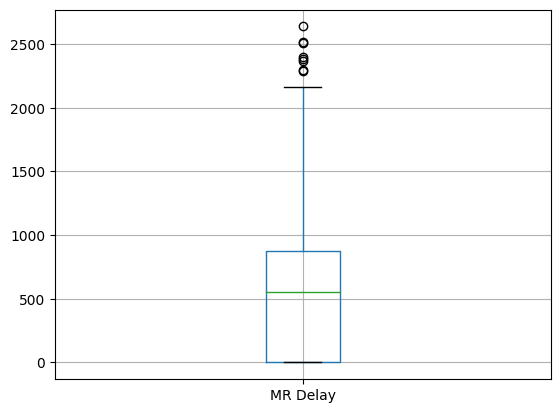

In [80]:
#MR Delay Outlier Check
df.iloc[:,[4]].boxplot()
#MR Dely
Q1 = df.iloc[:,4].quantile(0.25)
Q3 = df.iloc[:,4].quantile(0.75)
LB = Q1 - 1.5 * (Q3 - Q1)
UB = Q3 + 1.5 * (Q3 - Q1)
print(LB,UB)
df[df["MR Delay"] <0 ]
df[df["MR Delay"] >2182.5]

Based on exepert idea's outlier did not removed 

Handling Missing

Detect missing value 

In [5]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
Sex            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Imputation Missing value: MMSE missing value is imputed by median  and SES is imputed by define a function which is based on EDUC

In [81]:
df["MMSE"] = df.MMSE.fillna(df[df["Group"] == "Demented"]["MMSE"].median())

In [82]:
def fill_ses(x):
    ses=0
    if x >17:
        ses=1
    elif (x<17) and (x>15):
        ses=2
    elif (x<15) and (x>13):
        ses=3
    elif (x<13) and (x>11):
        ses=4
    else:
        ses:5
    return ses 

In [83]:
df["SES"]=df.apply(lambda x: fill_ses(x.EDUC) if pd.isna(x.SES) else x.SES, axis=1)

In [84]:
df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
Sex           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [85]:
df_visit=pd.DataFrame((df['Visit'].diff()!=1)& (df['Visit'].diff()>0))
df_visit[df_visit["Visit"] == True]


,Visit
11,True
30,True
34,True
69,True
188,True
274,True


In [86]:
index_visit_problem = df_visit[df_visit["Visit"] == True].index
df.loc[index_visit_problem,:]
df.iloc[9:12,:]

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,2.0,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,2.0,27.0,1.0,1365,0.727,1.286


In [87]:
####11
df.iloc[11,:]=df.iloc[11,:].replace(df.iloc[11,:]['Visit'],2)
df.iloc[12,:]=df.iloc[12,:].replace(df.iloc[12,:]['Visit'],3)
####30
df.iloc[30,:]=df.iloc[30,:].replace(df.iloc[30,:]['Visit'],2)
df.iloc[31,:]=df.iloc[31,:].replace(df.iloc[31,:]['Visit'],3)
df.iloc[32,:]=df.iloc[32,:].replace(df.iloc[32,:]['Visit'],4)
####34
df.iloc[34,:]=df.iloc[34,:].replace(df.iloc[34,:]['Visit'],2)
df.iloc[35,:]=df.iloc[35,:].replace(df.iloc[35,:]['Visit'],3)
####69
df.iloc[69,:]=df.iloc[69,:].replace(df.iloc[69,:]['Visit'],2)
df.iloc[70,:]=df.iloc[70,:].replace(df.iloc[70,:]['Visit'],3)
df.iloc[71,:]=df.iloc[71,:].replace(df.iloc[71,:]['Visit'],4)
####188
df.iloc[188,:]=df.iloc[188,:].replace(df.iloc[188,:]['Visit'],2)
####274
df.iloc[274,:]=df.iloc[274,:].replace(df.iloc[274,:]['Visit'],2)
df_visit=pd.DataFrame((df['Visit'].diff()!=1)& (df['Visit'].diff()>0))
df_visit[df_visit["Visit"] == True]

,Visit


Handling Categorical attributes  

In [88]:
groupmap={"Demented":1,"Nondemented":0,"Converted":1}
df['Group']=df['Group'].map(groupmap)
df.groupby('Group').nunique()
df['Sex']=df['Sex'].replace(['F','M'],[0,1])


In [90]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,4.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,4.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,4.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,0,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,0,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [91]:
df.to_csv('output.csv', index=False)